# MCMC Pagerank

In [5]:
# Do imports
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np

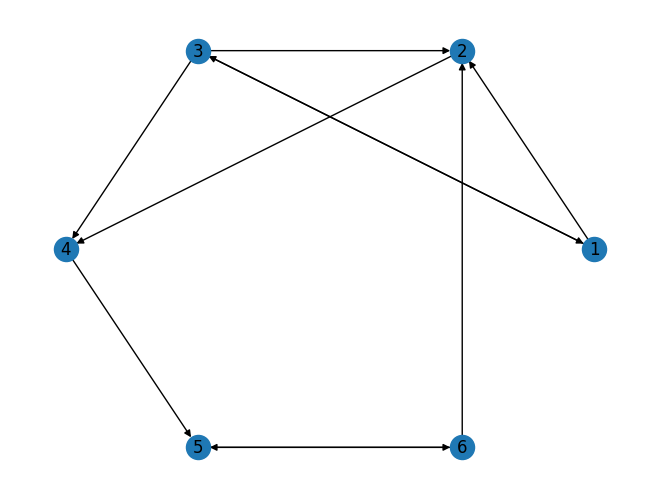

In [6]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add vertices
edges = [(1, 2), (1, 3), (3, 2), (3, 1), (3, 4), (4, 5), (5, 6), (6, 5),(3,2),(2,4),(6,2)]
G.add_edges_from(edges)

# Draw the graph
nx.draw_circular(G, with_labels=True)
plt.show()

In [21]:

# Since the graph G is a DiGraph (Directed Graph), we can use the adjacency_matrix method from networkx to get the adjacency matrix
# Then, we normalize each row to sum to 1 to get the transition matrix

# Get the adjacency matrix (returns a scipy sparse matrix)
adj_matrix = nx.adjacency_matrix(G)

# Convert to a dense numpy array
adj_matrix = adj_matrix.toarray()

# Calculate the sum of each row
row_sums = adj_matrix.sum(axis=1)

# Normalize the matrix (this is the transition matrix)
transition_matrix = adj_matrix / row_sums[:, np.newaxis]
print(transition_matrix.T)


[[0.         0.         0.33333333 0.         0.         0.        ]
 [0.5        0.         0.33333333 0.         0.         0.5       ]
 [0.5        0.         0.         0.         0.         0.        ]
 [0.         1.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.5       ]
 [0.         0.         0.         0.         1.         0.        ]]

## *If not doing pagerank: Initializing a random stochastic matrix*

In [23]:
import numpy as np

# Create a 6x6 matrix with random values
matrix = np.random.rand(6, 6)

# Normalize the matrix to make it a stochastic matrix
stochastic_matrix = matrix / matrix.sum(axis=1, keepdims=True)

# Square the matrix to increase the difference between values
matrix_squared = np.square(stochastic_matrix)

# Normalize the squared matrix to make it a stochastic matrix
stochastic_matrix_squared = matrix_squared / matrix_squared.sum(axis=1, keepdims=True)

## *Finding the stationary state of the matrix*

In [22]:

# Use the transition matrix from the pagerank
stochastic_matrix = transition_matrix

# Compute the eigenvalues and right eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(np.transpose(stochastic_matrix))

# Find the index of the eigenvalue equal to 1
index = np.where(np.isclose(eigenvalues, 1))

# The corresponding eigenvector is the stationary distribution
stationary_distribution = np.real_if_close(eigenvectors[:, index].flatten())

# Normalize the stationary distribution so it sums to 1
stationary_distribution /= np.sum(stationary_distribution)

print(stationary_distribution)

[8.33434164e-17 1.66666667e-01 1.44157602e-16 1.66666667e-01
 3.33333333e-01 3.33333333e-01]

### *Double-check that the stationary state really is stationary*

In [23]:
# Multiply the stationary distribution by the transition matrix
result = np.dot(stationary_distribution, stochastic_matrix)

# Check if the result is the same as the stationary distribution
is_stationary = np.allclose(result, stationary_distribution)

print(is_stationary)


True

## *Doing a MCMC simulation of the system*

### *Simulate the states*

In [15]:
# Initialize the state
state = np.random.choice(6)

# Number of passes
num_passes = 1000

# Store the states
# Initialize the state variable
states = np.zeros(num_passes)

for _ in range(num_passes):
    # Choose the next state based on the probabilities in the transition matrix
    # The column in the transition matrix corresponding to our current state gives the probabilities
    state = np.random.choice(6, p=stochastic_matrix[state])
    states[_]=(state)

# Convert the states to a numpy array
states = np.array(states)


### *Plot the emperical distribution*

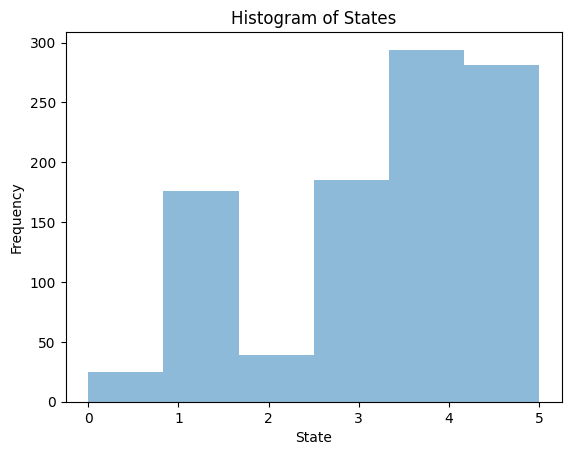

In [16]:
import matplotlib.pyplot as plt

plt.hist(states, bins=6, alpha=0.5)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Histogram of States')
plt.show()


## *Comparing the theoretical and emperical results*

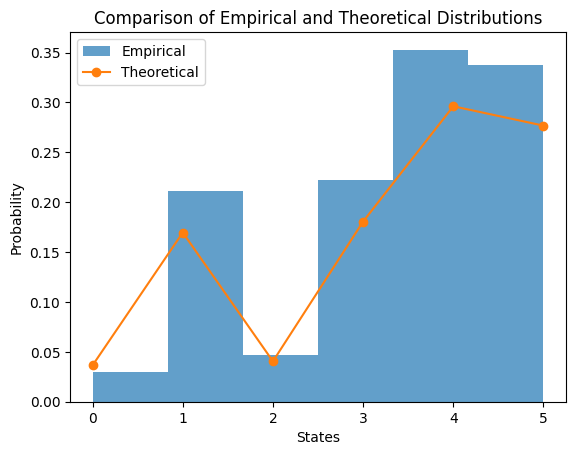

In [17]:
# Plotting the histogram of states
plt.hist(states, bins=6, density=True, alpha=0.7, label='Empirical')

# Plotting the stationary distribution
plt.plot(stationary_distribution, label='Theoretical', marker='o')

plt.title('Comparison of Empirical and Theoretical Distributions')
plt.xlabel('States')
plt.ylabel('Probability')
plt.legend()

plt.show()


### *Watching the emperical distribution develop over time*

Once 
 
 Loop 
 
 Reflect

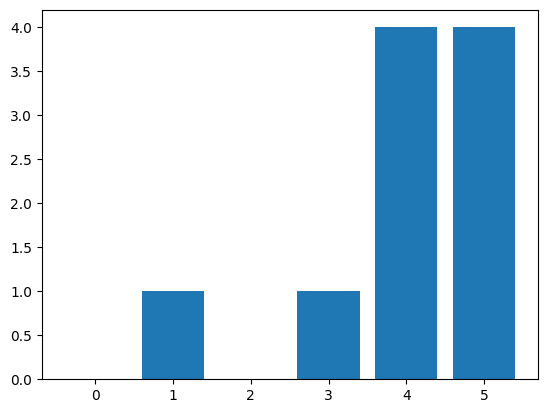

In [75]:
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Use stochastic_matrix as the transition matrix
Q = stochastic_matrix

# Initialize the figure
fig, ax = plt.subplots()
num_frames=100;
# Initialize an empty array for the empirical distribution
empirical_distribution = np.zeros((num_frames, len(Q[0])))

# Initialize the state variable
state = 0

# Function to update the empirical distribution
# Modify the update function to run 10 iterations without updating i
def update(i):
    global state, empirical_distribution
    empirical_distribution[i] = empirical_distribution[i-1]
    for _ in range(10):  # Run 10 iterations
        state = np.random.choice(range(len(Q[state])), p=Q[state])
        empirical_distribution[i, state] += 1
    # Plot the distribution
    ax.clear()
    ax.bar(range(len(Q[state])), empirical_distribution[i] )


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(1, num_frames), repeat=False)

# Use the HTML object to display the animation
HTML(ani.to_jshtml())


## *Adding teleportation*

In [18]:


# Normalize the teleportation matrix
teleportation = np.ones(np.shape(transition_matrix))
row_sums = teleportation.sum(axis=1)
teleportation = teleportation / row_sums[:, np.newaxis]

alpha = .15

transition_matrix_combined = (1-alpha)*transition_matrix + alpha*teleportation